In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To visualize the whole grid
pd.options.display.max_columns = 999

In [2]:
# Read both train and test data
train = pd.read_csv("../../data/train.csv")
test = pd.read_csv("../../data/test.csv")

In [3]:
# Convert all null values to 0. It is assumed that the if it is null value, the customer did not buy such product
train = train.fillna(0)
test =  test.fillna(0)

In [4]:
# Lets drop User ID and Product ID
drop_columns = ['User_ID', 'Product_ID']
train.drop(drop_columns, inplace = True, axis =1)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [6]:
# Remove category 19 and 20 fron Product Category 1 from Train
removal = train.index[(train.Product_Category_1.isin([19,20]))]
train = train.drop(removal)

In [7]:
# Convert Stay_in_current_city_years to binary by using dummy variables
dummy_gender = pd.get_dummies(train['Gender'])
dummy_age = pd.get_dummies(train['Age'])
dummy_city = pd.get_dummies(train['City_Category'])
dummy_current_city = pd.get_dummies(train['Stay_In_Current_City_Years'])

In [8]:
train_final = pd.concat([train,dummy_gender,dummy_age,dummy_city, dummy_current_city], axis = 1)
train_final.head(100)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,0.0,0.0,8370,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,0.0,0.0,1422,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.0,0.0,1057,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,0.0,0.0,7969,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,0-17,10,A,3,0,1,2.0,4.0,4211,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
96,M,0-17,10,A,3,0,11,0.0,0.0,1539,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
97,M,18-25,16,B,0,0,3,12.0,0.0,3055,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
98,M,18-25,15,A,4+,0,1,8.0,17.0,12099,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [9]:
train_final.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'F', 'M',
       '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', 'A', 'B',
       'C', '0', '1', '2', '3', '4+'],
      dtype='object')

In [10]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545915 entries, 0 to 545914
Data columns (total 27 columns):
Gender                        545915 non-null object
Age                           545915 non-null object
Occupation                    545915 non-null int64
City_Category                 545915 non-null object
Stay_In_Current_City_Years    545915 non-null object
Marital_Status                545915 non-null int64
Product_Category_1            545915 non-null int64
Product_Category_2            545915 non-null float64
Product_Category_3            545915 non-null float64
Purchase                      545915 non-null int64
F                             545915 non-null uint8
M                             545915 non-null uint8
0-17                          545915 non-null uint8
18-25                         545915 non-null uint8
26-35                         545915 non-null uint8
36-45                         545915 non-null uint8
46-50                         545915 non-null uin

In [11]:
X = train_final[['Occupation','Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'F', 'M',
       '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', 'A', 'B',
       'C', '0', '1', '2', '3', '4+']]
y = train_final['Purchase']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(linear_model.fit(X_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


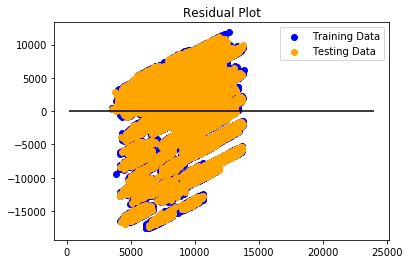

In [14]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = linear_model.predict(X_test)
linear_model.fit(X_train, y_train)
plt.scatter(linear_model.predict(X_train), linear_model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(linear_model.predict(X_test), linear_model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [15]:
print('Intercept parameter:', linear_model.intercept_)
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Intercept parameter: -442121873898449.3
                     Coefficient
Occupation          5.963674e+00
Marital_Status     -5.837523e+01
Product_Category_1 -3.189819e+02
Product_Category_2  8.488780e+00
Product_Category_3  1.473675e+02
F                   3.390288e+11
M                   3.390288e+11
0-17               -6.079113e+13
18-25              -6.079113e+13
26-35              -6.079113e+13
36-45              -6.079113e+13
46-50              -6.079113e+13
51-55              -6.079113e+13
55+                -6.079113e+13
A                   1.050005e+14
B                   1.050005e+14
C                   1.050005e+14
0                   3.975735e+14
1                   3.975735e+14
2                   3.975735e+14
3                   3.975735e+14
4+                  3.975735e+14


In [16]:
linear_predictions = linear_model.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", linear_predictions)

Predicted purchases (in dollars) for new costumers: [8405.125  8187.     9815.3125 ... 8601.6875 8768.4375 7995.5   ]


In [17]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, linear_predictions))
print('MSE:', metrics.mean_squared_error(y_test, linear_predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, linear_predictions)))

MAE: 3543.5956318749254
MSE: 21436668.01914804
RMSE 4629.9749480043665


In [18]:
linear_predictions_df = pd.DataFrame(linear_predictions)
linear_predictions_df

,0
0,8405.1250
1,8187.0000
2,9815.3125
3,12035.8750
4,8872.3750
...,...
109178,8150.2500
109179,10418.8125
109180,8601.6875
109181,8768.4375


In [19]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

lasso_predictions = lasso.predict(X_test)

# MSE = mean_squared_error(y_test, lasso_predictions)
# r2 = lasso.score(X_test, y_test)
### END SOLUTION

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, lasso_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lasso_predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, lasso_predictions)))

MAE: 3543.5899961167142
MSE: 21436519.87173312
RMSE 4629.95894924924


C:\Users\pablo\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39889613686.06738, tolerance: 1082986544.1517148
  positive)


In [20]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

elastic_predictions = elasticnet.predict(X_test)

# MSE = mean_squared_error(y_test, elastic_predictions)
# r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print('MAE:', metrics.mean_absolute_error(y_test, elastic_predictions))
print('MSE:', metrics.mean_squared_error(y_test, elastic_predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, elastic_predictions)))


MAE: 3543.1783623577803
MSE: 21436455.899525866
RMSE 4629.952040737125


In [21]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

ridge_predictions = ridge.predict(X_test)

# MSE = mean_squared_error(y_test, predictions)
# r2 = ridge.score(X_test, y_test)
### END SOLUTION

print('MAE:', metrics.mean_absolute_error(y_test, ridge_predictions))
print('MSE:', metrics.mean_squared_error(y_test, ridge_predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, ridge_predictions)))

MAE: 3543.592544568055
MSE: 21436520.285921
RMSE 4629.958993978348


In [22]:
from sklearn.tree import DecisionTreeRegressor  
regressor_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
regressor_model = regressor_model.fit(X_train, y_train)
regressor_predictions = regressor_model.predict(X_test)
regressor_score = regressor_model.score(X_train,y_train)

print('Purchase Predictions:', regressor_predictions)
print('MAE:', metrics.mean_absolute_error(y_test, regressor_predictions))
print('MSE:', metrics.mean_squared_error(y_test, regressor_predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, regressor_predictions)))
print('Model Accuracy (score):', regressor_score)

Purchase Predictions: [ 7674.25436568  7674.25436568 10715.95918367 ...  6146.54627034
  6146.54627034  7359.61284184]
MAE: 2260.8566227375386
MSE: 8955775.999668341
RMSE 2992.620256509058
Model Accuracy (score): 0.6425674001087862


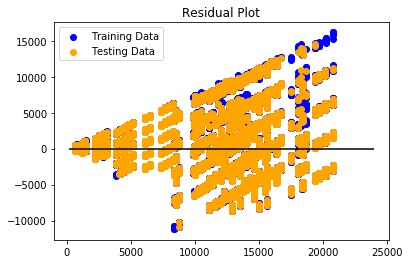

In [23]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
regressor_predictions= regressor_model.predict(X_test)
regressor_model.fit(X_train, y_train)
plt.scatter(regressor_model.predict(X_train), regressor_model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor_model.predict(X_test), regressor_model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [26]:
## If we had a classification problem, we should use random forest

# from sklearn.ensemble import RandomForestClassifier
# randomforest_model = RandomForestClassifier(max_depth=8, min_samples_leaf=150)
# randomforest_model = randomforest_model.fit(X_train, y_train)
# randomforest_predictions = randomforest_model.predict(X_test)
# randomforest_score = randomforest_model.score(X_train,y_train)

# print('Purchase Predictions:', randomforest_predictions)
# print('MAE:', metrics.mean_absolute_error(y_test, randomforest_predictions))
# print('MSE:', metrics.mean_squared_error(y_test, randomforest_predictions))
# print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, randomforest_predictions)))
# print('Model Accuracy (score):', randomforest_score)

In [ ]:

# # import export_graphviz 
# from sklearn.tree import export_graphviz  
  
# # export the decision tree to a tree.dot file 
# # for visualizing the plot easily anywhere 
# export_graphviz(regressor_model, out_file ='tree.dot', 
#                feature_names =['Purchase']) 

## Huy Model

In [ ]:
# Read both train and test data
train2 = pd.read_csv("../../data/trainCLEAN.csv")
test2 = pd.read_csv("../../data/testCLEAN.csv")

In [ ]:
# Lets drop User ID and Product ID
drop_columns = ['User_ID', 'Product_ID']
train2.drop(drop_columns, inplace = True, axis =1)

In [ ]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import tqdm
import math
from tpot import TPOTClassifier
from sklearn.metrics import f1_score, accuracy_score

def evaluate(pipeline, X_train, X_test, y_train, y_test):
    '''
    Evaluate a pipeline on training and test datasets
    '''    
    pipeline.fit(X_train, y_train)
    y_train_hat = pipeline.predict(X_train)
    y_test_hat = pipeline.predict(X_test)
    train_f1 = f1_score(y_train_hat, y_train)
    train_acc = accuracy_score(y_train_hat, y_train)
    test_f1 = f1_score(y_test_hat, y_test)
    test_acc = accuracy_score(y_test_hat, y_test)

    print(f"========== Predictor: {type(pipeline).__name__} ==========")
    print(f"Training result: f1: {train_f1:.3f}, acc: {train_acc:.3f}")
    print(f"Test result: f1: {test_f1:.3f}, acc: {test_acc:.3f}")
    print()


In [ ]:
# build X and y matrices
X = train_final[['Occupation','Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'F', 'M',
       '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', 'A', 'B',
       'C', '0', '1', '2', '3', '4+']]
y = train_final[['Purchase']].values.reshape(-1)

In [ ]:
# split to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# call TPOT and wait
tpot_clf = TPOTClassifier(generations=5, population_size=1, verbosity=2, n_jobs=-1,
    max_time_mins=1, scoring='f1')
tpot_clf.fit(X_train, y_train)

# evaluate result
y_hat_test = tpot_clf.predict(X_test)
print(f'F1: {f1_score(y_test, y_hat_test)}')
print(f'Acc: {accuracy_score(y_test, y_hat_test)}')

# # export model into python code
# tpot_clf.export('tpot_model.py')